# Cargar librerias y datos

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
rcParams['figure.figsize'] = 15, 10
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
import plotly.graph_objects as go
import random 
import statsmodels.api as sm
import datetime as datetime

In [2]:
data = pd.ExcelFile('Serie de Ejercicios.xlsx')
print(data.sheet_names)

['Desocupados en miles', 'IPP', 'ISE', 'Colcap', 'PIB', 'Demanda Energía California']


In [3]:
df = data.parse('PIB')

print(df)
type(df)

     Año  Trimestre           PIB
0   2005          3   5826.406269
1   2005          6   6290.856388
2   2005          9   6671.701095
3   2005         12   6650.036248
4   2006          3   6054.239946
..   ...        ...           ...
59  2019         12  17951.867600
60  2020          3  18692.206659
61  2020          6  18376.524745
62  2020          9  19960.252381
63  2020         12  20012.519034

[64 rows x 3 columns]


pandas.core.frame.DataFrame

In [10]:
ind = pd.date_range(start='3/2005', end='3/2021', freq='Q')
len(ind)
print(ind)

DatetimeIndex(['2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
      

In [12]:
PIBts =pd.Series(df['PIB'].values,index=ind)
#SerieInt
type(PIBts)
print(PIBts)

2005-03-31     5826.406269
2005-06-30     6290.856388
2005-09-30     6671.701095
2005-12-31     6650.036248
2006-03-31     6054.239946
                  ...     
2019-12-31    17951.867600
2020-03-31    18692.206659
2020-06-30    18376.524745
2020-09-30    19960.252381
2020-12-31    20012.519034
Freq: Q-DEC, Length: 64, dtype: float64


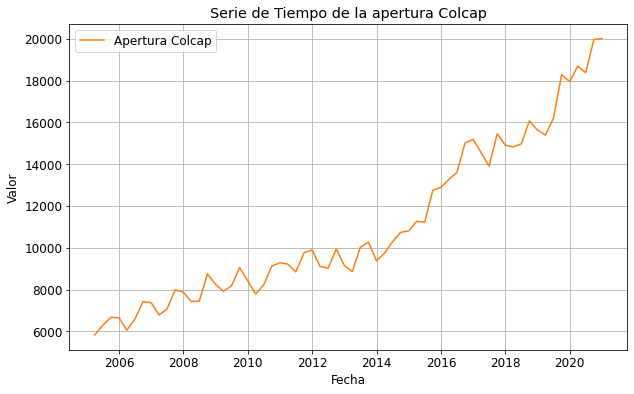

In [13]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(PIBts, color='tab:orange', label='Apertura Colcap')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
ax.set_title('Serie de Tiempo de la apertura Colcap')
ax.grid(True)
ax.legend(loc='upper left');

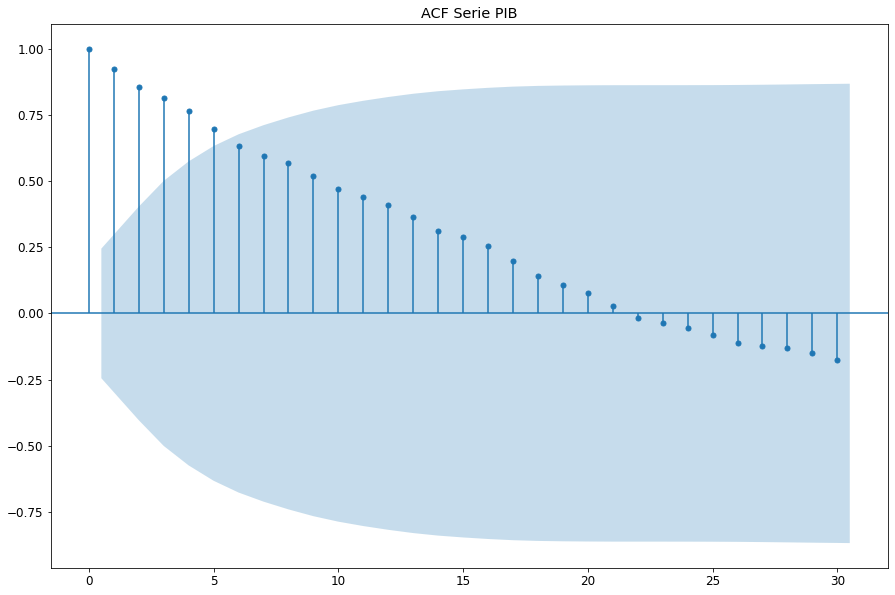

In [14]:
a=plot_acf(PIBts,adjusted=False,lags=30,title='ACF Serie PIB')

Transformación Box Cox 

In [16]:
import scipy as sp
import scipy.stats ####En ocasiones puede funcionar la línea 46 sin ésta línea.
data1 = df
print(sp.stats.boxcox(data1['PIB'],alpha=0.05))

(array([1.94115552, 1.9420677 , 1.94274305, 1.94270621, 1.94161618,
       1.94258646, 1.94390803, 1.94384868, 1.9429269 , 1.94338783,
       1.94469049, 1.94454555, 1.94392195, 1.94396106, 1.94560599,
       1.94501503, 1.94459106, 1.94493286, 1.94593672, 1.94522319,
       1.94442351, 1.94498527, 1.94601739, 1.94618321, 1.94611512,
       1.94571323, 1.94664994, 1.94678925, 1.94599386, 1.94590666,
       1.94683081, 1.94604107, 1.94572732, 1.94689959, 1.94712348,
       1.94627331, 1.94663829, 1.94713302, 1.94752757, 1.94757824,
       1.94794873, 1.94791321, 1.94898946, 1.94907408, 1.9493098 ,
       1.94950477, 1.95026314, 1.95035029, 1.95002747, 1.94968072,
       1.95048001, 1.95020946, 1.95017082, 1.95024454, 1.9507649 ,
       1.95056241, 1.95045089, 1.95082627, 1.95166753, 1.95154468,
       1.95181827, 1.95170365, 1.95225081, 1.95226774]), -0.5089098045601529, (-1.300229506749781, 0.2804326755248734))


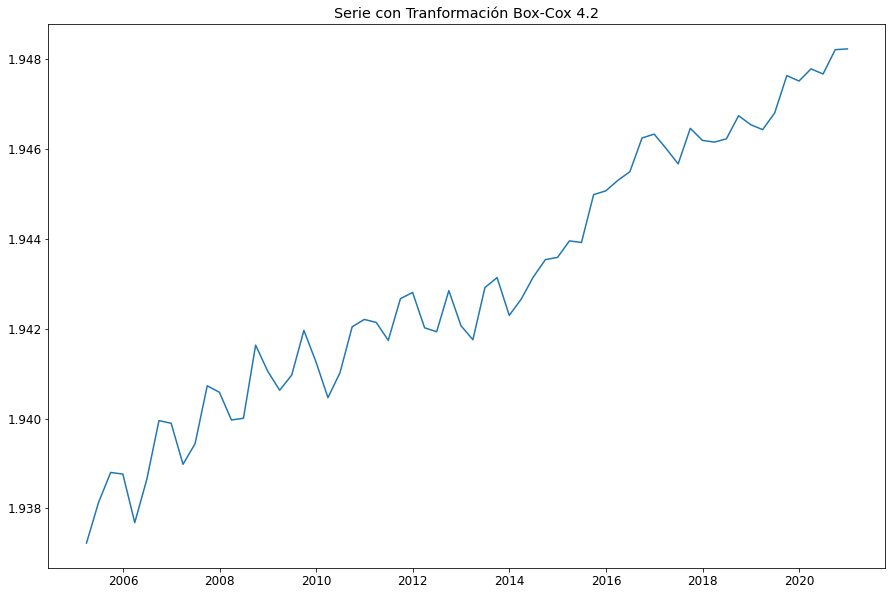

In [18]:
tPIB =sp.stats.boxcox(data1['PIB'], lmbda= -0.51)
trans = data1.assign(tPIB=tPIB)

tCOL1 = trans.set_index(ind)
tPIBco = tCOL1['tPIB']
plt.plot(tPIBco)
plt.title('Serie con Tranformación Box-Cox 4.2')
plt.show()

Miramos retardos

In [19]:
dif_PIBts=PIBts.diff(periods=1)

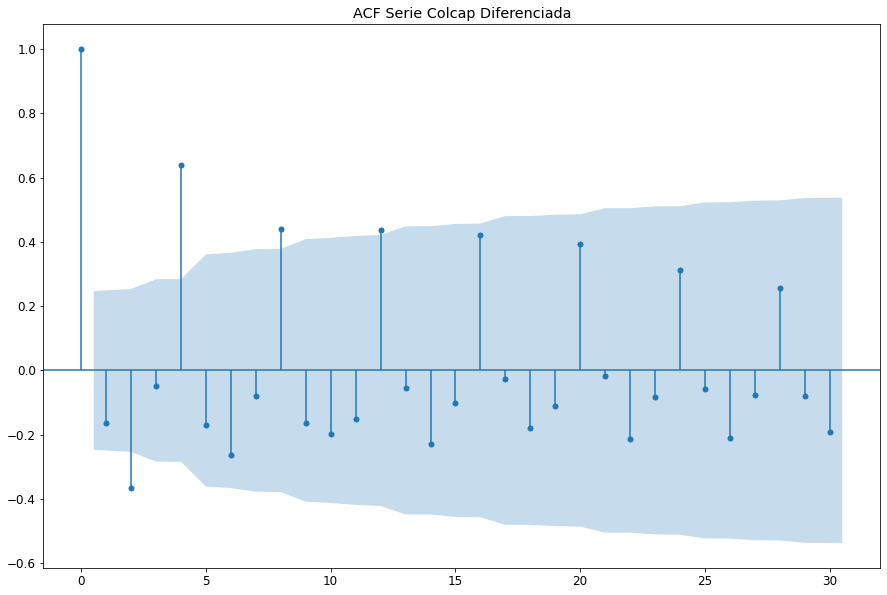

In [21]:
#a=plot_acf(ISEts,adjusted=False,lags=20,title='ACF Serie ISE')
b=plot_acf(dif_PIBts.dropna(),adjusted=False,lags=30,title='ACF Serie Colcap Diferenciada')
#c=plot_acf(COLdetrend,adjusted=False,lags=20,title='ACF Serie Colcap sin Tendencia')

## Suavizamiento exponencial

Text(0, 0.5, 'resid')

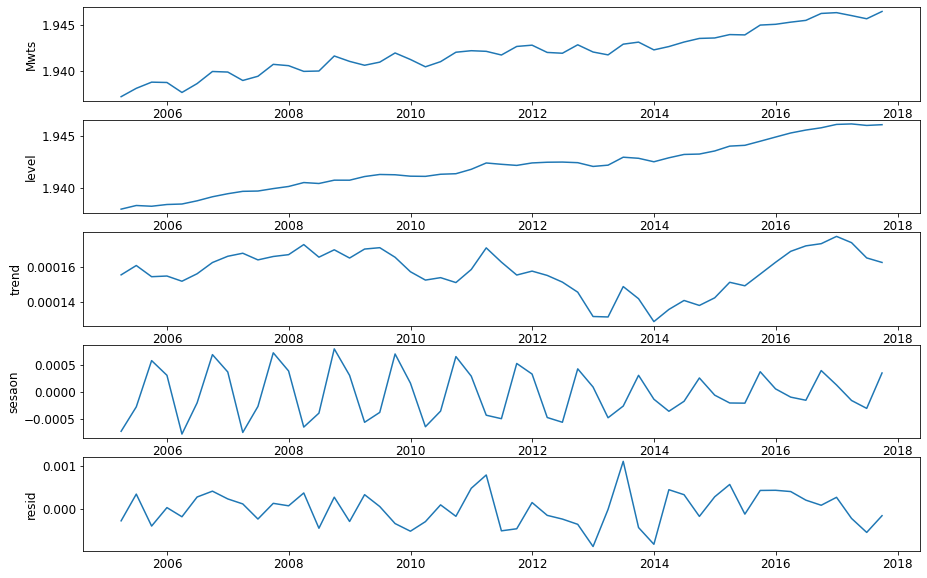

In [23]:
####Holt-Winters
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt #suavizamiento exponencial
#print(pd.infer_freq(data['Month'], warn=True))

trainCOL = tPIBco[0:51] # USAR EL TAMAÑO PARA VALIDAR DESPUES
fit1 = ExponentialSmoothing(trainCOL, seasonal_periods=4, trend='add', seasonal='add', initialization_method="estimated",use_boxcox=False).fit()
#metemos la serie, hacemos explicita la frecuencia de cada cuanto observa

####ejecutar desde la línea 74 hasta la 88
plt.subplot(5, 1, 1)
plt.plot(tPIBco[0:51])
plt.ylabel('Mwts')
plt.subplot(5, 1, 2)
plt.plot(fit1.level)
plt.ylabel('level')
plt.subplot(5, 1, 3)
plt.plot(fit1.trend)
plt.ylabel('trend')
plt.subplot(5, 1, 4)
plt.plot(fit1.season)
plt.ylabel('sesaon')
plt.subplot(5, 1, 5)
plt.plot(fit1.resid)
plt.ylabel('resid')

In [24]:
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,0.570714,True
smoothing_trend,beta,0.027177,True
smoothing_seasonal,gamma,0.271128,True
initial_level,l.0,1.938004,True
initial_trend,b.0,0.000160,True
initial_seasons.0,s.0,-0.000649,True
initial_seasons.1,s.1,-0.000364,True
initial_seasons.2,s.2,0.000699,True
initial_seasons.3,s.3,0.000308,True


<AxesSubplot:>

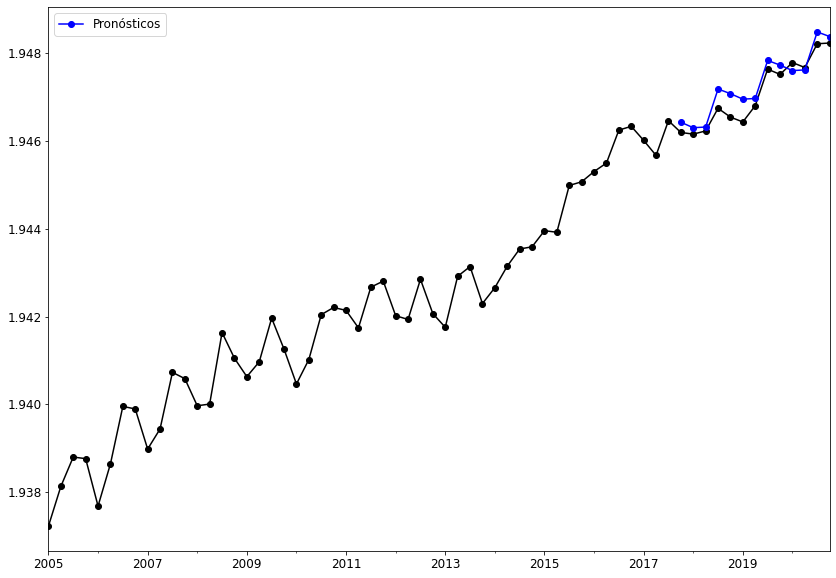

In [25]:
fcast1 = fit1.forecast(13).rename("Pronósticos")
ax = tPIBco.plot(color="black", marker="o", figsize=(14,10))
fcast1.plot(ax=ax, color='blue', marker="o", legend=True)

In [34]:
from scipy.special import boxcox, inv_boxcox
fcastr = inv_boxcox(fcast1, -0.51)
orig = PIBts[51:64]

<AxesSubplot:>

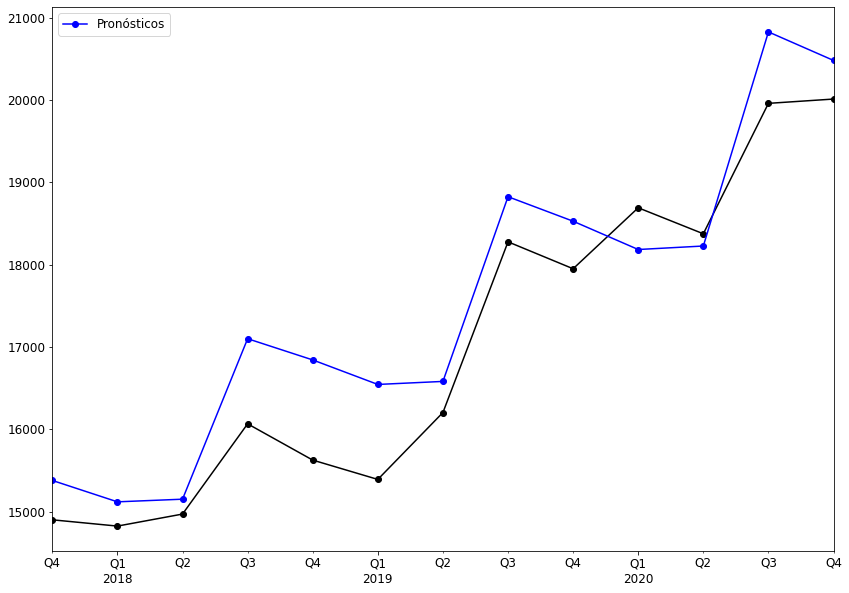

In [35]:
ax = orig.plot(color="black", marker="o", figsize=(14,10))
fcastr.plot(ax=ax, color='blue', marker="o", legend=True)

## Arboles

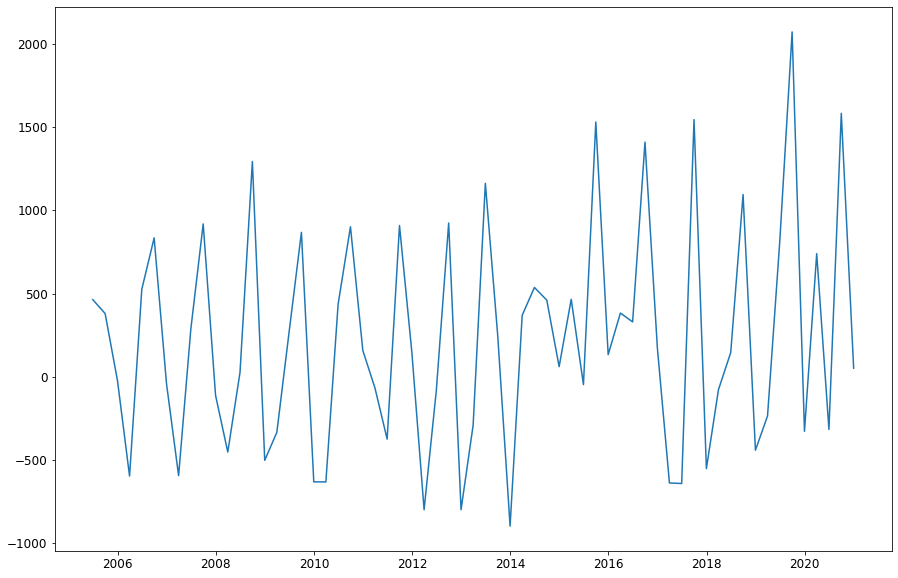

In [36]:
plt.plot(dif_PIBts)

In [44]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [45]:
dPIBdf = pd.DataFrame(dif_PIBts.values,index=dif_PIBts.index)
type(dPIBdf)
print(dPIBdf)

                      0
2005-03-31          NaN
2005-06-30   464.450120
2005-09-30   380.844706
2005-12-31   -21.664846
2006-03-31  -595.796302
...                 ...
2019-12-31  -326.858060
2020-03-31   740.339059
2020-06-30  -315.681914
2020-09-30  1583.727636
2020-12-31    52.266654

[64 rows x 1 columns]


In [46]:

for i in range(4,0,-1):
    df1[['t-'+str(i)]] = dPIBdf.shift(i)
    
print(df1)

                    t-4          t-3          t-2          t-1
2005-03-31          NaN          NaN          NaN          NaN
2005-06-30          NaN          NaN          NaN          NaN
2005-09-30          NaN          NaN          NaN   464.450120
2005-12-31          NaN          NaN   464.450120   380.844706
2006-03-31          NaN   464.450120   380.844706   -21.664846
...                 ...          ...          ...          ...
2019-12-31  -440.302112  -234.772678   812.222257  2072.911161
2020-03-31  -234.772678   812.222257  2072.911161  -326.858060
2020-06-30   812.222257  2072.911161  -326.858060   740.339059
2020-09-30  2072.911161  -326.858060   740.339059  -315.681914
2020-12-31  -326.858060   740.339059  -315.681914  1583.727636

[64 rows x 4 columns]


In [47]:

df1['t'] = dPIBdf.values
print(df1.head(13))

                   t-4         t-3         t-2         t-1           t
2005-03-31         NaN         NaN         NaN         NaN         NaN
2005-06-30         NaN         NaN         NaN         NaN  464.450120
2005-09-30         NaN         NaN         NaN  464.450120  380.844706
2005-12-31         NaN         NaN  464.450120  380.844706  -21.664846
2006-03-31         NaN  464.450120  380.844706  -21.664846 -595.796302
2006-06-30  464.450120  380.844706  -21.664846 -595.796302  526.112696
2006-09-30  380.844706  -21.664846 -595.796302  526.112696  835.282161
2006-12-31  -21.664846 -595.796302  526.112696  835.282161  -40.862197
2007-03-31 -595.796302  526.112696  835.282161  -40.862197 -593.367868
2007-06-30  526.112696  835.282161  -40.862197 -593.367868  287.325030
2007-09-30  835.282161  -40.862197 -593.367868  287.325030  919.165441
2007-12-31  -40.862197 -593.367868  287.325030  919.165441 -110.924928
2008-03-31 -593.367868  287.325030  919.165441 -110.924928 -451.705507


In [48]:
df1_PIB = df1[5:]
print(df1_PIB)
df1_PIB.size

                    t-4          t-3          t-2          t-1            t
2006-06-30   464.450120   380.844706   -21.664846  -595.796302   526.112696
2006-09-30   380.844706   -21.664846  -595.796302   526.112696   835.282161
2006-12-31   -21.664846  -595.796302   526.112696   835.282161   -40.862197
2007-03-31  -595.796302   526.112696   835.282161   -40.862197  -593.367868
2007-06-30   526.112696   835.282161   -40.862197  -593.367868   287.325030
2007-09-30   835.282161   -40.862197  -593.367868   287.325030   919.165441
2007-12-31   -40.862197  -593.367868   287.325030   919.165441  -110.924928
2008-03-31  -593.367868   287.325030   919.165441  -110.924928  -451.705507
2008-06-30   287.325030   919.165441  -110.924928  -451.705507    27.170419
2008-09-30   919.165441  -110.924928  -451.705507    27.170419  1293.879546
2008-12-31  -110.924928  -451.705507    27.170419  1293.879546  -501.329450
2009-03-31  -451.705507    27.170419  1293.879546  -501.329450  -333.437148
2009-06-30  

295

In [49]:
COLsplit = df1_PIB.values
# split into lagged variables and original time series
X1= COLsplit[:, 0:-1] # slice all rows and start with column 0 and go up to but not including the last column
y1 =COLsplit[:,-1] # slice all rows and last column, essentially separating out 't' column

print(X1)
print(y1)

[[ 464.45011971  380.84470649  -21.6648463  -595.79630209]
 [ 380.84470649  -21.6648463  -595.79630209  526.11269619]
 [ -21.6648463  -595.79630209  526.11269619  835.2821614 ]
 [-595.79630209  526.11269619  835.2821614   -40.86219679]
 [ 526.11269619  835.2821614   -40.86219679 -593.36786785]
 [ 835.2821614   -40.86219679 -593.36786785  287.32502983]
 [ -40.86219679 -593.36786785  287.32502983  919.16544077]
 [-593.36786785  287.32502983  919.16544077 -110.92492827]
 [ 287.32502983  919.16544077 -110.92492827 -451.70550656]
 [ 919.16544077 -110.92492827 -451.70550656   27.17041946]
 [-110.92492827 -451.70550656   27.17041946 1293.87954559]
 [-451.70550656   27.17041946 1293.87954559 -501.32944987]
 [  27.17041946 1293.87954559 -501.32944987 -333.43714784]
 [1293.87954559 -501.32944987 -333.43714784  267.17474445]
 [-501.32944987 -333.43714784  267.17474445  868.49957405]
 [-333.43714784  267.17474445  868.49957405 -630.7159511 ]
 [ 267.17474445  868.49957405 -630.7159511  -631.1397209

In [51]:
from pandas import read_csv
Y1 = y1
traintarget_size = int(len(Y1) * 0.8) # Set split, este porcentaje tan raro es para que coincida con el 15.
#TAREA BUSCAR SI SE PUEDE AJUSTAR POR CUANTOS DIAS UNO QUIERE
train_target, test_target = Y1[0:traintarget_size], Y1[traintarget_size:len(Y1)]
print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 59
Training Observations for Target: 47
Testing Observations for Target: 12


In [52]:
# Features Train-Test split
trainfeature_size = int(len(X1) * 0.8)
train_feature, test_feature = X1[0:trainfeature_size], X1[trainfeature_size:len(X1)] ##Regresoras
print('Observations for feature: %d' % (len(X1)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 59
Training Observations for feature: 47
Testing Observations for feature: 12


### El arbol

In [53]:
#Decision Tree Regresion Model
from sklearn.tree import DecisionTreeRegressor
# Create a decision tree regression model with default arguments
decision_tree_COL = DecisionTreeRegressor() # max-depth not set
# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_COL.fit(train_feature, train_target)
# Check the score on train and test
print(decision_tree_COL.score(train_feature, train_target))
print(decision_tree_COL.score(test_feature,test_target))

1.0
-0.25925535413124057


In [54]:
for d in [2, 3, 4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_COL = DecisionTreeRegressor(max_depth=d)
    decision_tree_COL.fit(train_feature, train_target)
    # Print out the scores on train and test, deberiamos añadir el conjunto de validación cuando tengamos más modelos
    print('max_depth=', str(d))
    print(decision_tree_COL.score(train_feature, train_target))
    print(decision_tree_COL.score(test_feature, test_target), '\n')

max_depth= 2
0.6099577740829729
0.3790705409765157 

max_depth= 3
0.730608159590588
0.24458276514463773 

max_depth= 4
0.8222509986478435
-0.1651844667985074 

max_depth= 5
0.9271014472662416
-0.28229023584055035 

max_depth= 7
0.9954619429866131
-0.20778756132916842 

max_depth= 8
0.9993541225032646
-0.21209951970346452 

max_depth= 10
1.0
-0.27699760994641 



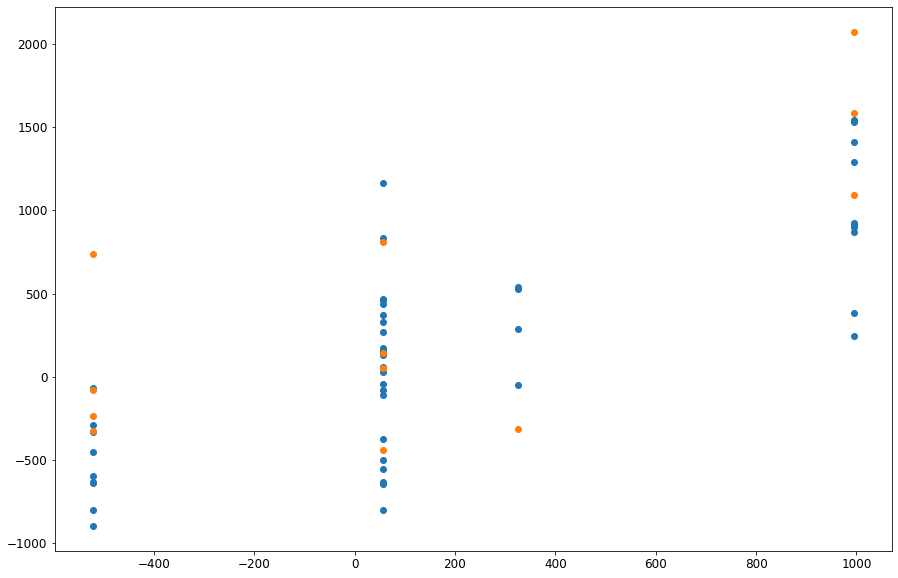

In [55]:
# Plot predicted against actual values
from matplotlib import pyplot as plt
# Use the best max_depth
decision_tree_EC = DecisionTreeRegressor(max_depth=2) # fill in best max depth here
decision_tree_EC.fit(train_feature, train_target)
# Predict values for train and test
train_prediction = decision_tree_EC.predict(train_feature)
test_prediction = decision_tree_EC.predict(test_feature)
# Scatter the predictions vs actual values
plt.scatter(train_prediction, train_target, label='train') # blue
plt.scatter(test_prediction, test_target, label='test') # orange
plt.show()

In [57]:
print(train_prediction.size)
print(train_target.size)

print(test_prediction.size)
print(test_target.size)

indicetrian_test=df1_PIB.index
print(indicetrian_test.size) ###Tamaño del índice


47
47
12
12
59


In [58]:
indicetrain=indicetrian_test[0:46]
indicetest=indicetrian_test[46:58]

print(indicetrain.size)
print(indicetest.size)

targetjoint=np.concatenate((train_target,test_target))
predictionjoint=np.concatenate((train_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

46
12
59
59


In [59]:
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_test)
ObsvsPred.head(10)

,observado,Predicción
2006-06-30,526.112696,326.221047
2006-09-30,835.282161,56.706416
2006-12-31,-40.862197,56.706416
2007-03-31,-593.367868,-521.984155
2007-06-30,287.325030,326.221047
2007-09-30,919.165441,994.339162
2007-12-31,-110.924928,56.706416
2008-03-31,-451.705507,-521.984155
2008-06-30,27.170419,56.706416
2008-09-30,1293.879546,994.339162


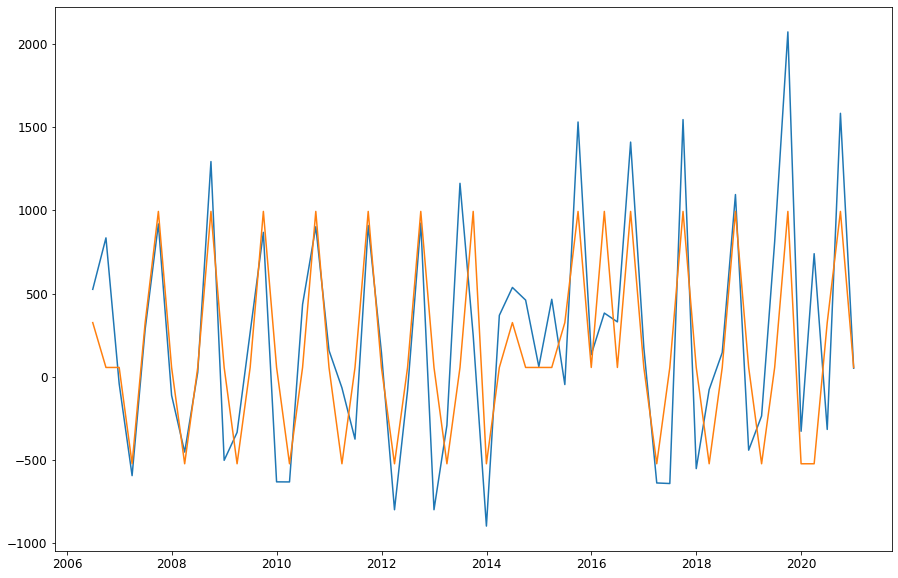

In [60]:
plt.plot(ObsvsPred)

In [61]:
PIBts[46]

15010.201535387263

In [62]:
x = np.array(test_prediction)
len(x)
predictionreal = np.concatenate(([15010.201535387263], x)).cumsum()
y = np.array(test_target)
len(y)
targetreal = np.concatenate(([15010.201535387263], y)).cumsum()

In [64]:
d = {'observado real': targetreal, 'Predicción real': predictionreal}
ObsvsPredr=pd.DataFrame(data=d,index=indicetrian_test[45:58])
ObsvsPredr.head(10)

,observado real,Predicción real
2017-09-30,15010.201535,15010.201535
2017-12-31,14933.908465,14488.217380
2018-03-31,15079.972479,14544.923796
2018-06-30,16175.623481,15539.262958
2018-09-30,15735.321369,15595.969374
2018-12-31,15500.548691,15073.985219
2019-03-31,16312.770947,15130.691635
2019-06-30,18385.682108,16125.030797
2019-09-30,18058.824048,15603.046642
2019-12-31,18799.163107,15081.062487


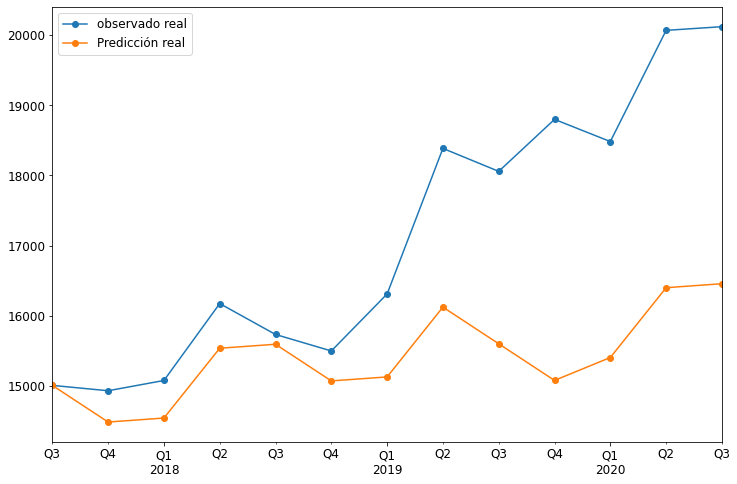

In [65]:
ax = ObsvsPredr.plot( marker="o", figsize=(12,8))

## Redes neuronales

In [66]:
print(df1_PIB.head(7))
df1_PIB.shape

                   t-4         t-3         t-2         t-1           t
2006-06-30  464.450120  380.844706  -21.664846 -595.796302  526.112696
2006-09-30  380.844706  -21.664846 -595.796302  526.112696  835.282161
2006-12-31  -21.664846 -595.796302  526.112696  835.282161  -40.862197
2007-03-31 -595.796302  526.112696  835.282161  -40.862197 -593.367868
2007-06-30  526.112696  835.282161  -40.862197 -593.367868  287.325030
2007-09-30  835.282161  -40.862197 -593.367868  287.325030  919.165441
2007-12-31  -40.862197 -593.367868  287.325030  919.165441 -110.924928


(59, 5)

In [68]:
# Split data
PRESsplit = df1_PIB.values
# split into lagged variables and original time series
X1= PRESsplit[:, 0:-1] # slice all rows and start with column 0 and go up to but not including the last column
y1 =PRESsplit[:,-1]

print(X1)
print(y1)

[[ 464.45011971  380.84470649  -21.6648463  -595.79630209]
 [ 380.84470649  -21.6648463  -595.79630209  526.11269619]
 [ -21.6648463  -595.79630209  526.11269619  835.2821614 ]
 [-595.79630209  526.11269619  835.2821614   -40.86219679]
 [ 526.11269619  835.2821614   -40.86219679 -593.36786785]
 [ 835.2821614   -40.86219679 -593.36786785  287.32502983]
 [ -40.86219679 -593.36786785  287.32502983  919.16544077]
 [-593.36786785  287.32502983  919.16544077 -110.92492827]
 [ 287.32502983  919.16544077 -110.92492827 -451.70550656]
 [ 919.16544077 -110.92492827 -451.70550656   27.17041946]
 [-110.92492827 -451.70550656   27.17041946 1293.87954559]
 [-451.70550656   27.17041946 1293.87954559 -501.32944987]
 [  27.17041946 1293.87954559 -501.32944987 -333.43714784]
 [1293.87954559 -501.32944987 -333.43714784  267.17474445]
 [-501.32944987 -333.43714784  267.17474445  868.49957405]
 [-333.43714784  267.17474445  868.49957405 -630.7159511 ]
 [ 267.17474445  868.49957405 -630.7159511  -631.1397209

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_val, y_train, y_val=train_test_split(X1,y1,test_size=0.2, train_size=0.8, shuffle=False)

print(X_train.shape) #80% DEL 90%
print(X_val.shape) #20 DEL 90%
print(y_train.shape)
print(y_val.shape)

(47, 4)
(12, 4)
(47,)
(12,)


In [70]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_train

array([[0.56049222, 0.52605987, 0.36028887, 0.1231055 ],
       [0.52605987, 0.36028887, 0.12383649, 0.58242918],
       [0.36028887, 0.12383649, 0.58588756, 0.70900705],
       [0.12383649, 0.58588756, 0.71321704, 0.35030252],
       [0.58588756, 0.71321704, 0.35238256, 0.12409974],
       [0.71321704, 0.35238256, 0.12483662, 0.4846665 ],
       [0.35238256, 0.12483662, 0.48754438, 0.74334992],
       [0.12483662, 0.48754438, 0.74776383, 0.32161795],
       [0.48754438, 0.74776383, 0.32352767, 0.18209809],
       [0.74776383, 0.32352767, 0.18317936, 0.37815593],
       [0.32352767, 0.18317936, 0.38040136, 0.89676259],
       [0.18317936, 0.38040136, 0.90208745, 0.16178142],
       [0.38040136, 0.90208745, 0.16274206, 0.23051865],
       [0.90208745, 0.16274206, 0.23188743, 0.47641672],
       [0.16274206, 0.23188743, 0.47924562, 0.72260668],
       [0.23188743, 0.47924562, 0.72689742, 0.10880896],
       [0.47924562, 0.72689742, 0.10945505, 0.10863546],
       [0.72689742, 0.10945505,

In [77]:
import tensorflow.keras as keras

model=keras.models.Sequential([keras.layers.Dense(32,activation="relu",input_shape=X_train.shape[1:]),keras.layers.Dense(1)])
#primera capa oculta con 32 unidades, fun. relu y dimensión de entrada    
#capa de salida con una de salida
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(loss="mean_squared_error",optimizer="sgd")
history=model.fit(X_train,y_train,epochs=80,validation_data=(X_val,y_val))

Epoch 1/80
2/2 [==============================] - 0s 138ms/step - loss: 452037.2292 - val_loss: 592623.7500
Epoch 2/80
2/2 [==============================] - 0s 43ms/step - loss: 400793.6667 - val_loss: 1055508.0000
Epoch 3/80
2/2 [==============================] - 0s 39ms/step - loss: 484797.7188 - val_loss: 3394820.0000
Epoch 4/80
2/2 [==============================] - 0s 40ms/step - loss: 2948522.2500 - val_loss: 825942.9375
Epoch 5/80
2/2 [==============================] - 0s 36ms/step - loss: 445031.9167 - val_loss: 819056.6875
Epoch 6/80
2/2 [==============================] - 0s 33ms/step - loss: 464690.5417 - val_loss: 811246.5000
Epoch 7/80
2/2 [==============================] - 0s 41ms/step - loss: 476307.0625 - val_loss: 805801.4375
Epoch 8/80
2/2 [==============================] - 0s 47ms/step - loss: 478595.3125 - val_loss: 800433.1875
Epoch 9/80
2/2 [==============================] - 0s 43ms/step - loss: 434758.9062 - val_loss: 794301.3125
Epoch 10/80
2/2 [================

<AxesSubplot:>

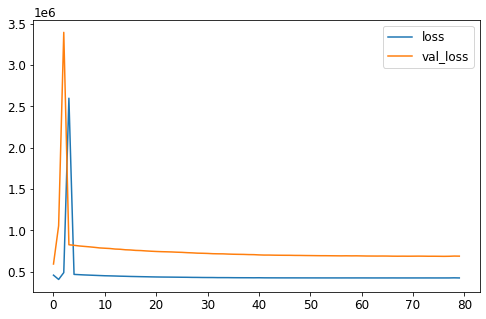

In [79]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [80]:
mse_test=model.evaluate(X_val,y_val)
print(mse_test)

1/1 [==============================] - 0s 16ms/step - loss: 687939.1875
687939.1875


In [81]:
ypred=model.predict(X_val)
print(ypred)

[[178.81015]
 [178.80035]
 [178.81015]
 [178.81015]
 [178.81015]
 [178.81015]
 [178.81015]
 [178.81015]
 [178.81015]
 [178.81015]
 [178.81015]
 [178.81015]]


Text(0.5, 0, 'Index')

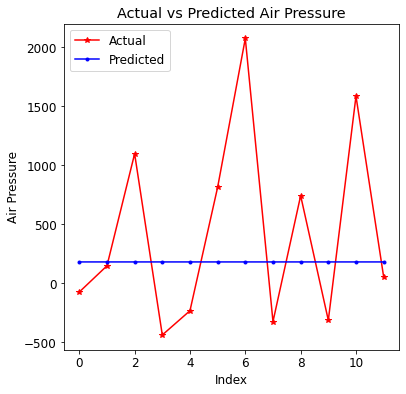

In [82]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_val.size), y_val, linestyle='-', marker='*', color='r')
plt.plot(range(ypred.size), ypred, linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')

## error cuadratico medio

In [83]:
#ARBOLES DE DECISION
import statistics as stats
stats.mean((ObsvsPredr["observado real"] - ObsvsPredr["Predicción real"])**2)

4904440.382092921

In [84]:
#SUAVIZAMIENTO
stats.mean((fit1.resid)**2)

1.6153296127201615e-07

In [85]:
#REDES
print(mse_test)

687939.1875


## graficar los errores
arboles

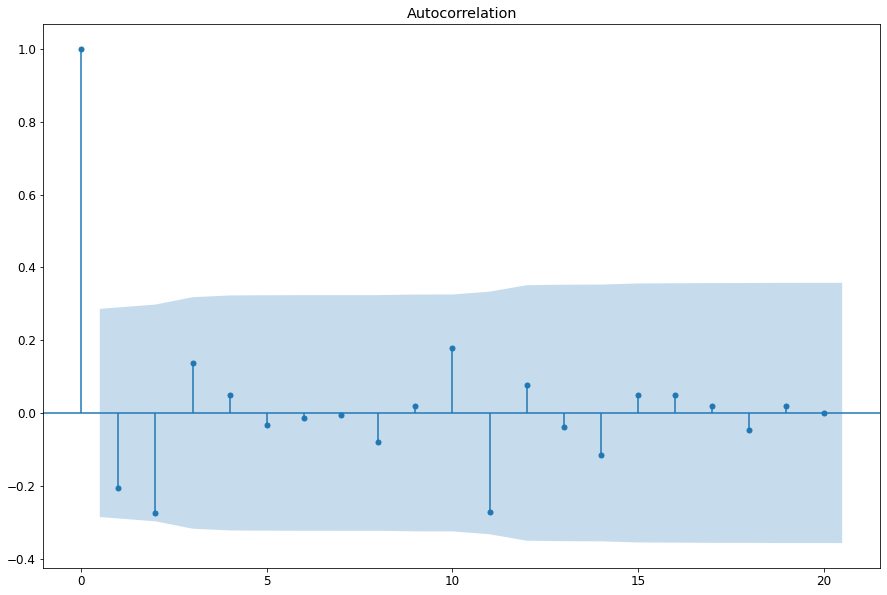

In [86]:
residuals = train_target - train_prediction
acfres=plot_acf(residuals, adjusted=False, lags=20)

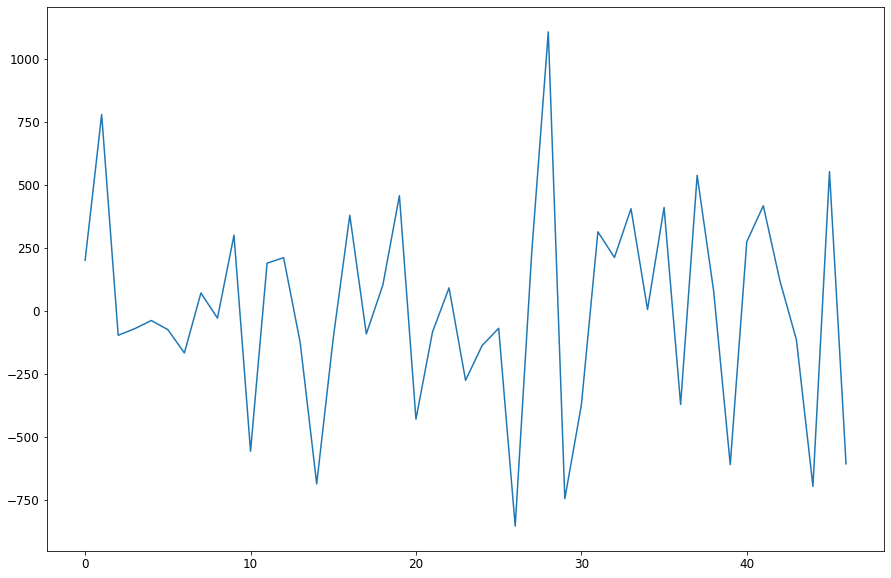

In [87]:
plt.plot(residuals)

suaviamiento

Text(0, 0.5, 'resid')

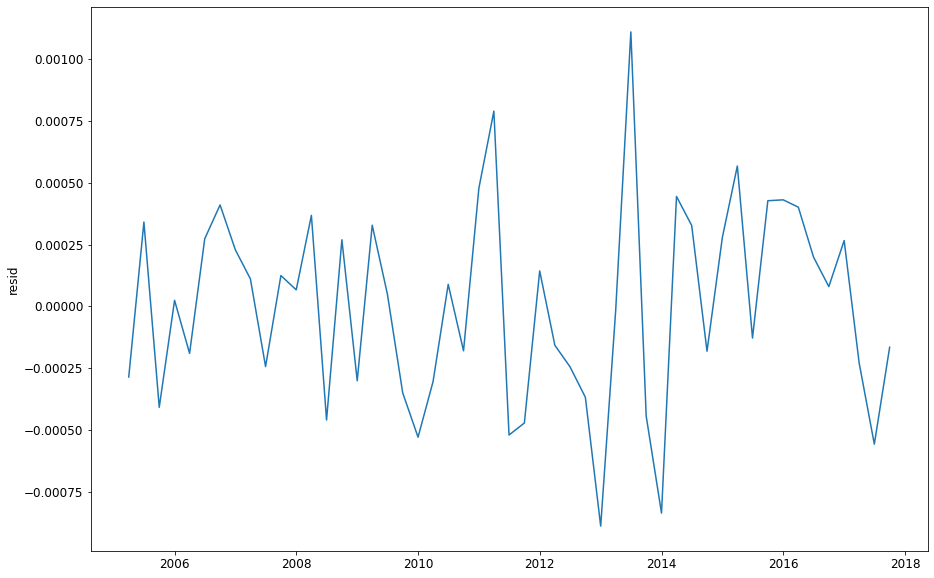

In [88]:
plt.plot(fit1.resid)
plt.ylabel('resid')

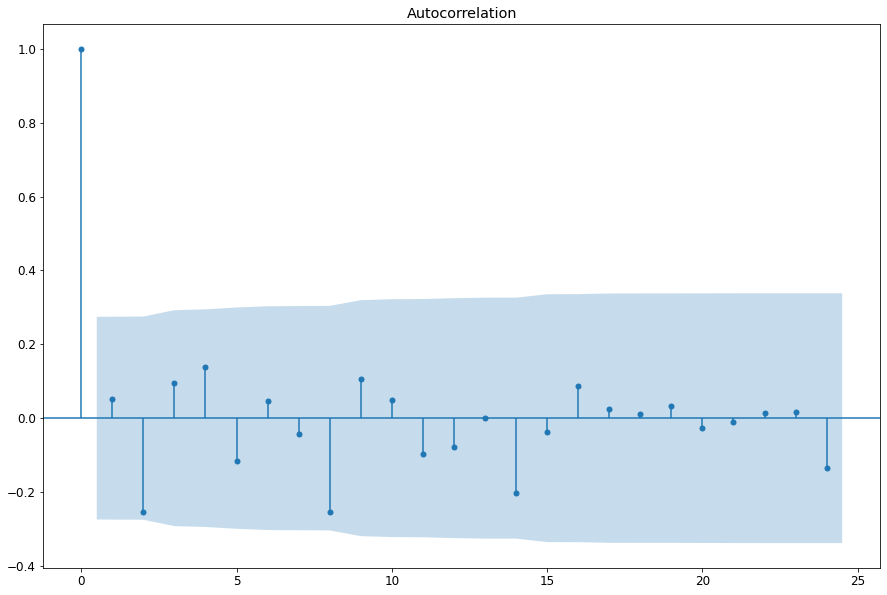

In [89]:
a = plot_acf(fit1.resid, adjusted = False, lags=24)

Redes

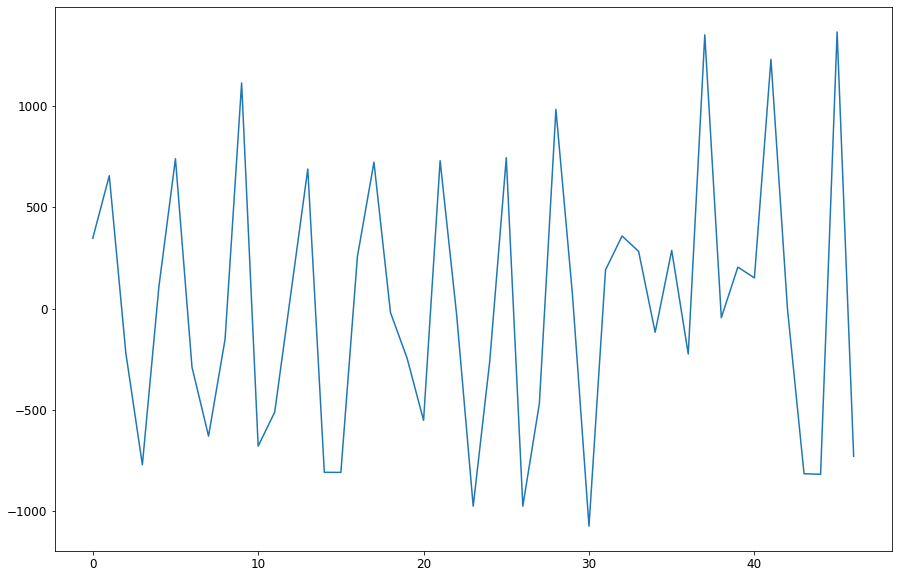

In [90]:
xpred = model.predict(X_train)
datasetpred = pd.DataFrame({'Column1': xpred[:, 0]}) #ESTO PARA TRATAR EL ARREGLO N-DIMENSIONAL
ered = y_train - datasetpred['Column1']
plt.plot(ered)

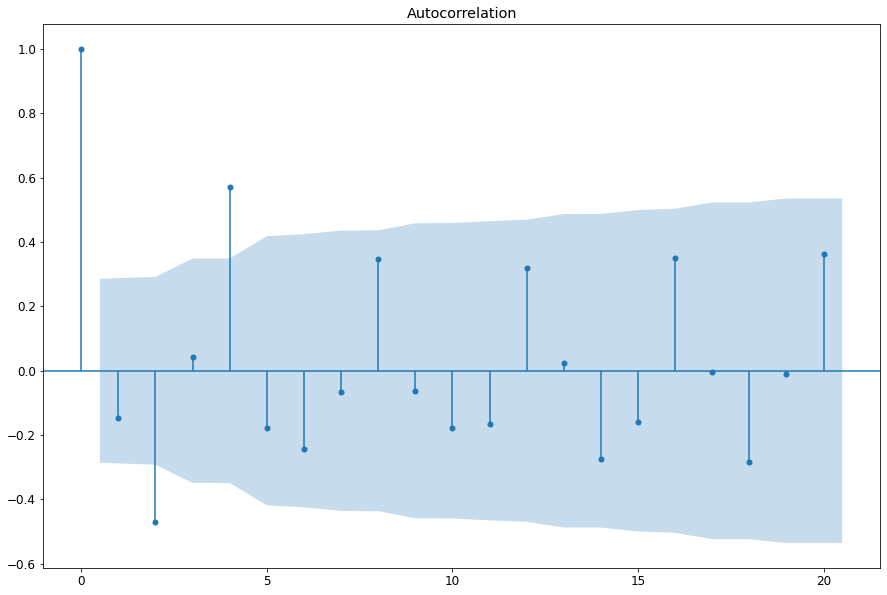

In [91]:
acfres=plot_acf(ered, adjusted=False, lags=20)